# European Parliament Speeches Analysis: Conflict Resolution
This notebook analyzes speeches from the European Parliament regarding conflict resolution, categorizing them by political position classification, country, and political group.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

# 1. Data Loading and Initial Exploration
First, we'll load the dataset and examine its structure and contents.

In [2]:
# Load the dataset
print("Loading data...")
try:
    df_speeches = pd.read_csv('prepared/speeches_prepared.csv')
    print(f"Speeches data shape: {df_speeches.shape}")
    print("Speeches columns:", df_speeches.columns.tolist())
    print("\nFirst few rows of speeches data:")
    print(df_speeches.head())
except:
    print("Could not load speeches_prepared.csv")
    df_speeches = None

try:
    df_speeches2 = pd.read_csv('prepared/speaches_prepared.csv')
    print(f"\nSecondary speeches data shape: {df_speeches2.shape}")
    print("Secondary speeches columns:", df_speeches2.columns.tolist())
    print("\nFirst few rows of secondary speeches data:")
    print(df_speeches2.head())
except:
    print("Could not load speaches_prepared.csv")
    df_speeches2 = None

# Select which dataset to use
if df_speeches is not None:
    df = df_speeches
elif df_speeches2 is not None:
    df = df_speeches2
else:
    print("No data available")
    exit()

Loading data...
Speeches data shape: (7625, 11)
Speeches columns: ['person_id', 'first_name', 'last_name', 'speech_index', 'theme_name', 'entailment_score', 'classification', 'speech_title', 'speech_link', 'group_code', 'country']

First few rows of speeches data:
   person_id first_name last_name  speech_index         theme_name  \
0      96934     Sandra  Kalniete             0   RussianWarCrimes   
1      96934     Sandra  Kalniete             0   RussianWarCrimes   
2      96934     Sandra  Kalniete             0   RussianWarCrimes   
3      96934     Sandra  Kalniete             0   RussianWarCrimes   
4      96934     Sandra  Kalniete             0  TribunalForRussia   

   entailment_score classification  \
0          0.139699        opposes   
1          0.139699        opposes   
2          0.139699        opposes   
3          0.139699        opposes   
4          0.015242        neutral   

                                        speech_title  \
0  Verbatim report of proceed

# 2. Theme Categorization
Define the categorization of themes into different political positions.

In [3]:
# Define sides dynamically based on content
SIDE_A = "Ukraine"
SIDE_B = "Critics"

pro_side_a_themes = {
    "RussianWarCrimes": "Condemns Russia's war crimes in Ukraine.",
    "TribunalForRussia": "Demands a tribunal for Russian leadership and military for war crimes.",
    "CivilianCasualtiesOutrage": "Expresses outrage at civilian casualties.",
    "StressesRussianResponsibility": "Emphasizes that Russia is responsible and must pay for reconstruction of Ukraine.",

    "UkraineSupport": "Advocates for continued financial, military, and humanitarian aid to Ukraine.",
    "EuropeanSecurityInvestment": "Frames aid as necessary for European collective security.",
    "CivilSocietySupport": "Stresses aid is crucial for Ukrainian civil society and administration.",
    "DefenseIndustryInvestment": "Proposes supporting Ukraine’s defense industry for self-reliance.",
    "UnwaveringSupport": "Reaffirms long-term support for Ukraine, citing military aid and EU integration.",
    "ConcreteActions": "Urges concrete actions like using frozen assets, achieving energy independence, and supporting Ukraine's rule of law.",

    "RussianAssetsForReparations": "Supports using frozen Russian assets to pay for reparations to Ukraine.",
    "UseFrozenAssets": "Proposes using frozen Russian assets to support Ukraine and overcome European divisions.",

    "MilitarySupportForUkraine": "Advocates for providing weapons and allowing Ukraine to strike military targets inside Russia.",
    "SupportsUkraineStrikes": "Advocates for allowing Ukraine to strike military targets inside Russia to defend itself.",
    "LanguageOfForce": "Argues that providing military means for victory is the only way to achieve a lasting peace.",
    "AdvocatesMilitarySupport": "Advocates for increased military support, weapons, and stronger sanctions against Russia.",
    "SecurityThreat": "Views Russian aggression as a direct threat to European security that must be countered.",

    "UkraineEUMembership": "Strongly supports Ukraine's accession to the EU as a crucial step for European security.",
    "UkraineReformProgress": "Acknowledges Ukraine's progress on reforms.",
    "CondemnsHungaryRussia": "Condemns Hungary for collaborating with Russia to sabotage Ukraine's EU integration.",

    "CriticizesWesternHesitation": "Criticizes Western hesitation and lack of action against Russia.",
    "EuropeanPowerlessness": "Criticizes European reliance on US authorization for military plans.",
    "EUSecurityAutonomy": "Calls for EU strategic autonomy to defend democracy and Ukraine.",
    "StrengthenSanctions": "Calls for stronger or more effectively enforced sanctions against Russia and its suppliers.",

    "ProUkraineSovereignty": "Advocates for Ukraine's full territorial integrity and sovereignty as a prerequisite for any just peace.",
    "DefendEuropeanValues": "Frames Ukraine as defending European values.",
}

pro_side_b_themes = {
}

neutral_themes = {
}

# Create a mapping of themes to content orientation
theme_content_mapping = {}
for theme in pro_side_a_themes:
    theme_content_mapping[theme] = f'Pro-{SIDE_A} Content'
for theme in pro_side_b_themes:
    theme_content_mapping[theme] = f'Pro-{SIDE_B} Content'
for theme in neutral_themes:
    theme_content_mapping[theme] = 'Neutral/Mixed Content'

print("\nTheme categorization:")
print(f"Pro-{SIDE_A} content themes:", list(pro_side_a_themes.keys()))
print(f"Pro-{SIDE_B} content themes:", list(pro_side_b_themes.keys()))
print("Neutral/Mixed content themes:", list(neutral_themes.keys()))

# Update theme mapping with detected sides
theme_content_mapping = {}
for theme in pro_side_a_themes:
    theme_content_mapping[theme] = f'Pro-{SIDE_A} Content'
for theme in pro_side_b_themes:
    theme_content_mapping[theme] = f'Pro-{SIDE_B} Content'
for theme in neutral_themes:
    theme_content_mapping[theme] = 'Neutral/Mixed Content'


Theme categorization:
Pro-Ukraine content themes: ['RussianWarCrimes', 'TribunalForRussia', 'CivilianCasualtiesOutrage', 'StressesRussianResponsibility', 'UkraineSupport', 'EuropeanSecurityInvestment', 'CivilSocietySupport', 'DefenseIndustryInvestment', 'UnwaveringSupport', 'ConcreteActions', 'RussianAssetsForReparations', 'UseFrozenAssets', 'MilitarySupportForUkraine', 'SupportsUkraineStrikes', 'LanguageOfForce', 'AdvocatesMilitarySupport', 'SecurityThreat', 'UkraineEUMembership', 'UkraineReformProgress', 'CondemnsHungaryRussia', 'CriticizesWesternHesitation', 'EuropeanPowerlessness', 'EUSecurityAutonomy', 'StrengthenSanctions', 'ProUkraineSovereignty', 'DefendEuropeanValues']
Pro-Critics content themes: []
Neutral/Mixed content themes: []


# 3. Data Exploration
Explore the dataset's structure, missing values, and basic statistics.

In [4]:
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
if 'theme_name' in df.columns:
    print(f"\nUnique themes: {df['theme_name'].nunique()}")
    print("Theme distribution:")
    print(df['theme_name'].value_counts())

if 'group_code' in df.columns:
    print(f"\nUnique political groups: {df['group_code'].nunique()}")
    print("Political group distribution:")
    print(df['group_code'].value_counts().head(10))

if 'country' in df.columns:
    print(f"\nUnique countries: {df['country'].nunique()}")
    print("Country distribution:")
    print(df['country'].value_counts().head(10))


DATA EXPLORATION
Dataset shape: (7625, 11)
Columns: ['person_id', 'first_name', 'last_name', 'speech_index', 'theme_name', 'entailment_score', 'classification', 'speech_title', 'speech_link', 'group_code', 'country']

Missing values:
person_id           0
first_name          0
last_name           0
speech_index        0
theme_name          0
entailment_score    0
classification      0
speech_title        0
speech_link         0
group_code          0
country             0
dtype: int64

Unique themes: 25
Theme distribution:
theme_name
RussianWarCrimes                 305
TribunalForRussia                305
CivilianCasualtiesOutrage        305
StressesRussianResponsibility    305
UkraineSupport                   305
EuropeanSecurityInvestment       305
CivilSocietySupport              305
DefenseIndustryInvestment        305
UnwaveringSupport                305
ConcreteActions                  305
OpposesUkraineAid                305
RussianAssetsForReparations      305
UseFrozenAssets 

# 4. Classification Analysis
Analyze the classification of speeches and standardize the values.

In [5]:
# Data exploration
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

print(f"Columns: {df.columns.tolist()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# CLASSIFICATION ANALYSIS
if 'classification' in df.columns:
    print(f"\n" + "="*30 + " CLASSIFICATION ANALYSIS " + "="*30)
    print(f"Classification distribution:")
    classification_counts = df['classification'].value_counts()
    print(classification_counts)
    
    # Standardize classification values
    df['classification_clean'] = df['classification'].str.lower().str.strip()
    print(f"\nStandardized classification distribution:")
    print(df['classification_clean'].value_counts())



DATA EXPLORATION
Columns: ['person_id', 'first_name', 'last_name', 'speech_index', 'theme_name', 'entailment_score', 'classification', 'speech_title', 'speech_link', 'group_code', 'country']

Missing values:
person_id           0
first_name          0
last_name           0
speech_index        0
theme_name          0
entailment_score    0
classification      0
speech_title        0
speech_link         0
group_code          0
country             0
dtype: int64

============================== CLASSIFICATION ANALYSIS ==============================
Classification distribution:
classification
neutral     5584
opposes     1622
supports     419
Name: count, dtype: int64

Standardized classification distribution:
classification_clean
neutral     5584
opposes     1622
supports     419
Name: count, dtype: int64


# 5. Theme-based Position Analysis
Categorize speeches based on their thematic position.

In [6]:
# Create content orientation based on themes
if 'theme_name' in df.columns:
    df['content_orientation'] = df['theme_name'].map(theme_content_mapping)
    print("\n" + "="*50)
    print("CONTENT ORIENTATION ANALYSIS")
    print("="*50)
    
    print("Content orientation distribution:")
    content_counts = df['content_orientation'].value_counts()
    print(content_counts)


CONTENT ORIENTATION ANALYSIS
Content orientation distribution:
content_orientation
Pro-Ukraine Content    7320
Name: count, dtype: int64


# 6. Cross-Analysis: Classification vs Theme-based Position
Compare the classification with the theme-based positions.

In [7]:
if 'classification_clean' in df.columns and 'content_orientation' in df.columns:
    print("\n" + "="*50)
    print("REVISED POSITION ANALYSIS")
    print("="*50)
    
    def determine_actual_position_revised(classification, content_orientation):
        if pd.isna(classification) or pd.isna(content_orientation):
            return 'Unknown'
        
        classification = str(classification).lower().strip()
        content_orientation = str(content_orientation)
        
        # If speaker supports content, their position aligns with the content orientation
        if classification == 'supports':
            if f'pro-{SIDE_A}'.lower() in content_orientation.lower():
                return f'Pro-{SIDE_A}'
            elif f'pro-{SIDE_B}'.lower() in content_orientation.lower():
                return f'Pro-{SIDE_B}'
            elif 'neutral' in content_orientation.lower():
                return 'Neutral/Peace-focused'
        
        # If speaker opposes content, we can't assume they support the opposite
        elif classification == 'opposes':
            if f'pro-{SIDE_A}'.lower() in content_orientation.lower():
                return f'Critical of {SIDE_A}'
            elif f'pro-{SIDE_B}'.lower() in content_orientation.lower():
                return f'Critical of {SIDE_B}'
            elif 'neutral' in content_orientation.lower():
                return 'Opposed to Neutral/Peace Efforts'
        
        # Neutral classification
        else:  # neutral
            if f'pro-{SIDE_A}'.lower() in content_orientation.lower():
                return f'Neutral on {SIDE_A} Content'
            elif f'pro-{SIDE_B}'.lower() in content_orientation.lower():
                return f'Neutral on {SIDE_B} Content'
            elif 'neutral' in content_orientation.lower():
                return 'Neutral'
        
        return 'Unknown'
    
    # Apply the revised position logic
    df['actual_position'] = df.apply(
        lambda row: determine_actual_position_revised(row['classification_clean'], row['content_orientation']), 
        axis=1
    )
    
    print("Revised position distribution:")
    actual_position_counts = df['actual_position'].value_counts()
    print(actual_position_counts)
    
    # Calculate percentages
    actual_position_percentages = (actual_position_counts / len(df) * 100).round(2)
    print("\nRevised position percentages:")
    for pos, pct in actual_position_percentages.items():
        print(f"{pos}: {pct}%")
    
    # Create simplified position categories (more conservative)
    def simplify_position_revised(actual_position):
        actual_position = str(actual_position)
        if f'Pro-{SIDE_A}' in actual_position:
            return f'Pro-{SIDE_A}'
        elif f'Pro-{SIDE_B}' in actual_position:
            return f'Pro-{SIDE_B}'
        elif 'Neutral' in actual_position:
            return 'Neutral/Mixed'
        else:
            return 'Other/Unknown'
    
    df['simplified_position'] = df['actual_position'].apply(simplify_position_revised)
    
    print("\nSimplified position distribution (revised):")
    simplified_counts = df['simplified_position'].value_counts()
    print(simplified_counts)
    
    simplified_percentages = (simplified_counts / len(df) * 100).round(2)
    print("\nSimplified position percentages:")
    for pos, pct in simplified_percentages.items():
        print(f"{pos}: {pct}%")

print("\n" + "="*50)
print("CLEAR POSITIONS ONLY (Supports Classification)")
print("="*50)

if 'classification_clean' in df.columns and 'content_orientation' in df.columns:
    # Filter to only speakers who explicitly support content
    df_supporters = df[df['classification_clean'] == 'supports'].copy()
    
    def determine_clear_position(content_orientation):
        content_orientation = str(content_orientation)
        if f'pro-{SIDE_A}'.lower() in content_orientation.lower():
            return f'Pro-{SIDE_A}'
        elif f'pro-{SIDE_B}'.lower() in content_orientation.lower():
            return f'Pro-{SIDE_B}'
        elif 'neutral' in content_orientation.lower():
            return 'Neutral/Peace-focused'
        return 'Other'
    
    df_supporters['clear_position'] = df_supporters['content_orientation'].apply(determine_clear_position)
    
    print(f"Speakers with clear support positions: {len(df_supporters)}")
    print("Clear support position distribution:")
    clear_counts = df_supporters['clear_position'].value_counts()
    print(clear_counts)
    
    clear_percentages = (clear_counts / len(df_supporters) * 100).round(2)
    print("\nClear support position percentages:")
    for pos, pct in clear_percentages.items():
        print(f"{pos}: {pct}%")



REVISED POSITION ANALYSIS
Revised position distribution:
actual_position
Neutral on Ukraine Content    5502
Critical of Ukraine           1399
Pro-Ukraine                    419
Unknown                        305
Name: count, dtype: int64

Revised position percentages:
Neutral on Ukraine Content: 72.16%
Critical of Ukraine: 18.35%
Pro-Ukraine: 5.5%
Unknown: 4.0%

Simplified position distribution (revised):
simplified_position
Neutral/Mixed    5502
Other/Unknown    1704
Pro-Ukraine       419
Name: count, dtype: int64

Simplified position percentages:
Neutral/Mixed: 72.16%
Other/Unknown: 22.35%
Pro-Ukraine: 5.5%

CLEAR POSITIONS ONLY (Supports Classification)
Speakers with clear support positions: 419
Clear support position distribution:
clear_position
Pro-Ukraine    419
Name: count, dtype: int64

Clear support position percentages:
Pro-Ukraine: 100.0%


# 7. Political Groups Analysis
Analyze how different political groups are classified.

In [8]:
# Political Groups Analysis with Corrected Position
if 'group_code' in df.columns and 'simplified_position' in df.columns:
    print("\n" + "="*50)
    print("POLITICAL GROUPS vs CORRECTED POSITION ANALYSIS")
    print("="*50)
    
    # Filter for groups with sufficient data
    min_speeches = 5
    active_groups = df['group_code'].value_counts()
    active_groups = active_groups[active_groups >= min_speeches].index.tolist()
    
    print(f"Groups with at least {min_speeches} speeches: {len(active_groups)}")
    
    if len(active_groups) > 0:
        print(f"\nTop groups by corrected position:")
        for position in df['simplified_position'].unique():
            if pd.notna(position) and position != 'Other/Unknown':
                groups_in_position = df[df['simplified_position'] == position]['group_code'].value_counts().head(5)
                print(f"\nMost active groups with '{position}' position:")
                for group, count in groups_in_position.items():
                    total_speeches = df[df['group_code'] == group].shape[0]
                    pct = (count / total_speeches * 100) if total_speeches > 0 else 0
                    print(f"  {group}: {count}/{total_speeches} speeches ({pct:.1f}%)")


POLITICAL GROUPS vs CORRECTED POSITION ANALYSIS
Groups with at least 5 speeches: 10

Top groups by corrected position:

Most active groups with 'Neutral/Mixed' position:
  EPP: 1426/1975 speeches (72.2%)
  SD: 932/1275 speeches (73.1%)
  RENEW: 673/950 speeches (70.8%)
  ECR: 597/825 speeches (72.4%)
  GREEN_EFA: 505/650 speeches (77.7%)

Most active groups with 'Pro-Ukraine' position:
  EPP: 118/1975 speeches (6.0%)
  SD: 90/1275 speeches (7.1%)
  RENEW: 74/950 speeches (7.8%)
  ECR: 44/825 speeches (5.3%)
  GREEN_EFA: 42/650 speeches (6.5%)


# 8. Country Analysis
Analyze how different countries are classified.

In [9]:
# Country Analysis with Corrected Position
if 'country' in df.columns and 'simplified_position' in df.columns:
    print("\n" + "="*50)
    print("COUNTRY vs CORRECTED POSITION ANALYSIS")
    print("="*50)
    
    # Filter for countries with sufficient data
    min_speeches_country = 3
    active_countries = df['country'].value_counts()
    active_countries = active_countries[active_countries >= min_speeches_country].index.tolist()
    
    print(f"Countries with at least {min_speeches_country} speeches: {len(active_countries)}")
    
    if len(active_countries) > 0:
        print(f"\nTop countries by corrected position:")
        for position in df['simplified_position'].unique():
            if pd.notna(position) and position != 'Other/Unknown':
                countries_in_position = df[df['simplified_position'] == position]['country'].value_counts().head(5)
                print(f"\nMost active countries with '{position}' position:")
                for country, count in countries_in_position.items():
                    total_speeches = df[df['country'] == country].shape[0]
                    pct = (count / total_speeches * 100) if total_speeches > 0 else 0
                    print(f"  {country}: {count}/{total_speeches} speeches ({pct:.1f}%)")


COUNTRY vs CORRECTED POSITION ANALYSIS
Countries with at least 3 speeches: 24

Top countries by corrected position:

Most active countries with 'Neutral/Mixed' position:
  DEU: 1130/1475 speeches (76.6%)
  POL: 422/650 speeches (64.9%)
  FRA: 418/575 speeches (72.7%)
  LVA: 409/675 speeches (60.6%)
  LTU: 360/525 speeches (68.6%)

Most active countries with 'Pro-Ukraine' position:
  DEU: 54/1475 speeches (3.7%)
  LTU: 40/525 speeches (7.6%)
  FRA: 37/575 speeches (6.4%)
  NLD: 36/300 speeches (12.0%)
  LVA: 32/675 speeches (4.7%)


# 9. Data Visualizations
Create comprehensive visualizations to illustrate the findings.

In [10]:
# Remove all undefined ones
df_known_positions = df[
    (df['simplified_position'].notna()) &
    (df['simplified_position'] != 'Other/Unknown') &
    (df['simplified_position'] != 'Neutral/Mixed')
].copy()

print("\n" + "="*50)
print("FILTERED DATAFRAME (without 'Other/Unknown' positions)")
print("="*50)
print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_known_positions)}")
print(f"Removed: {len(df) - len(df_known_positions)} rows")



FILTERED DATAFRAME (without 'Other/Unknown' positions)
Original dataset size: 7625
Filtered dataset size: 419
Removed: 7206 rows



CREATING ENHANCED VISUALIZATIONS


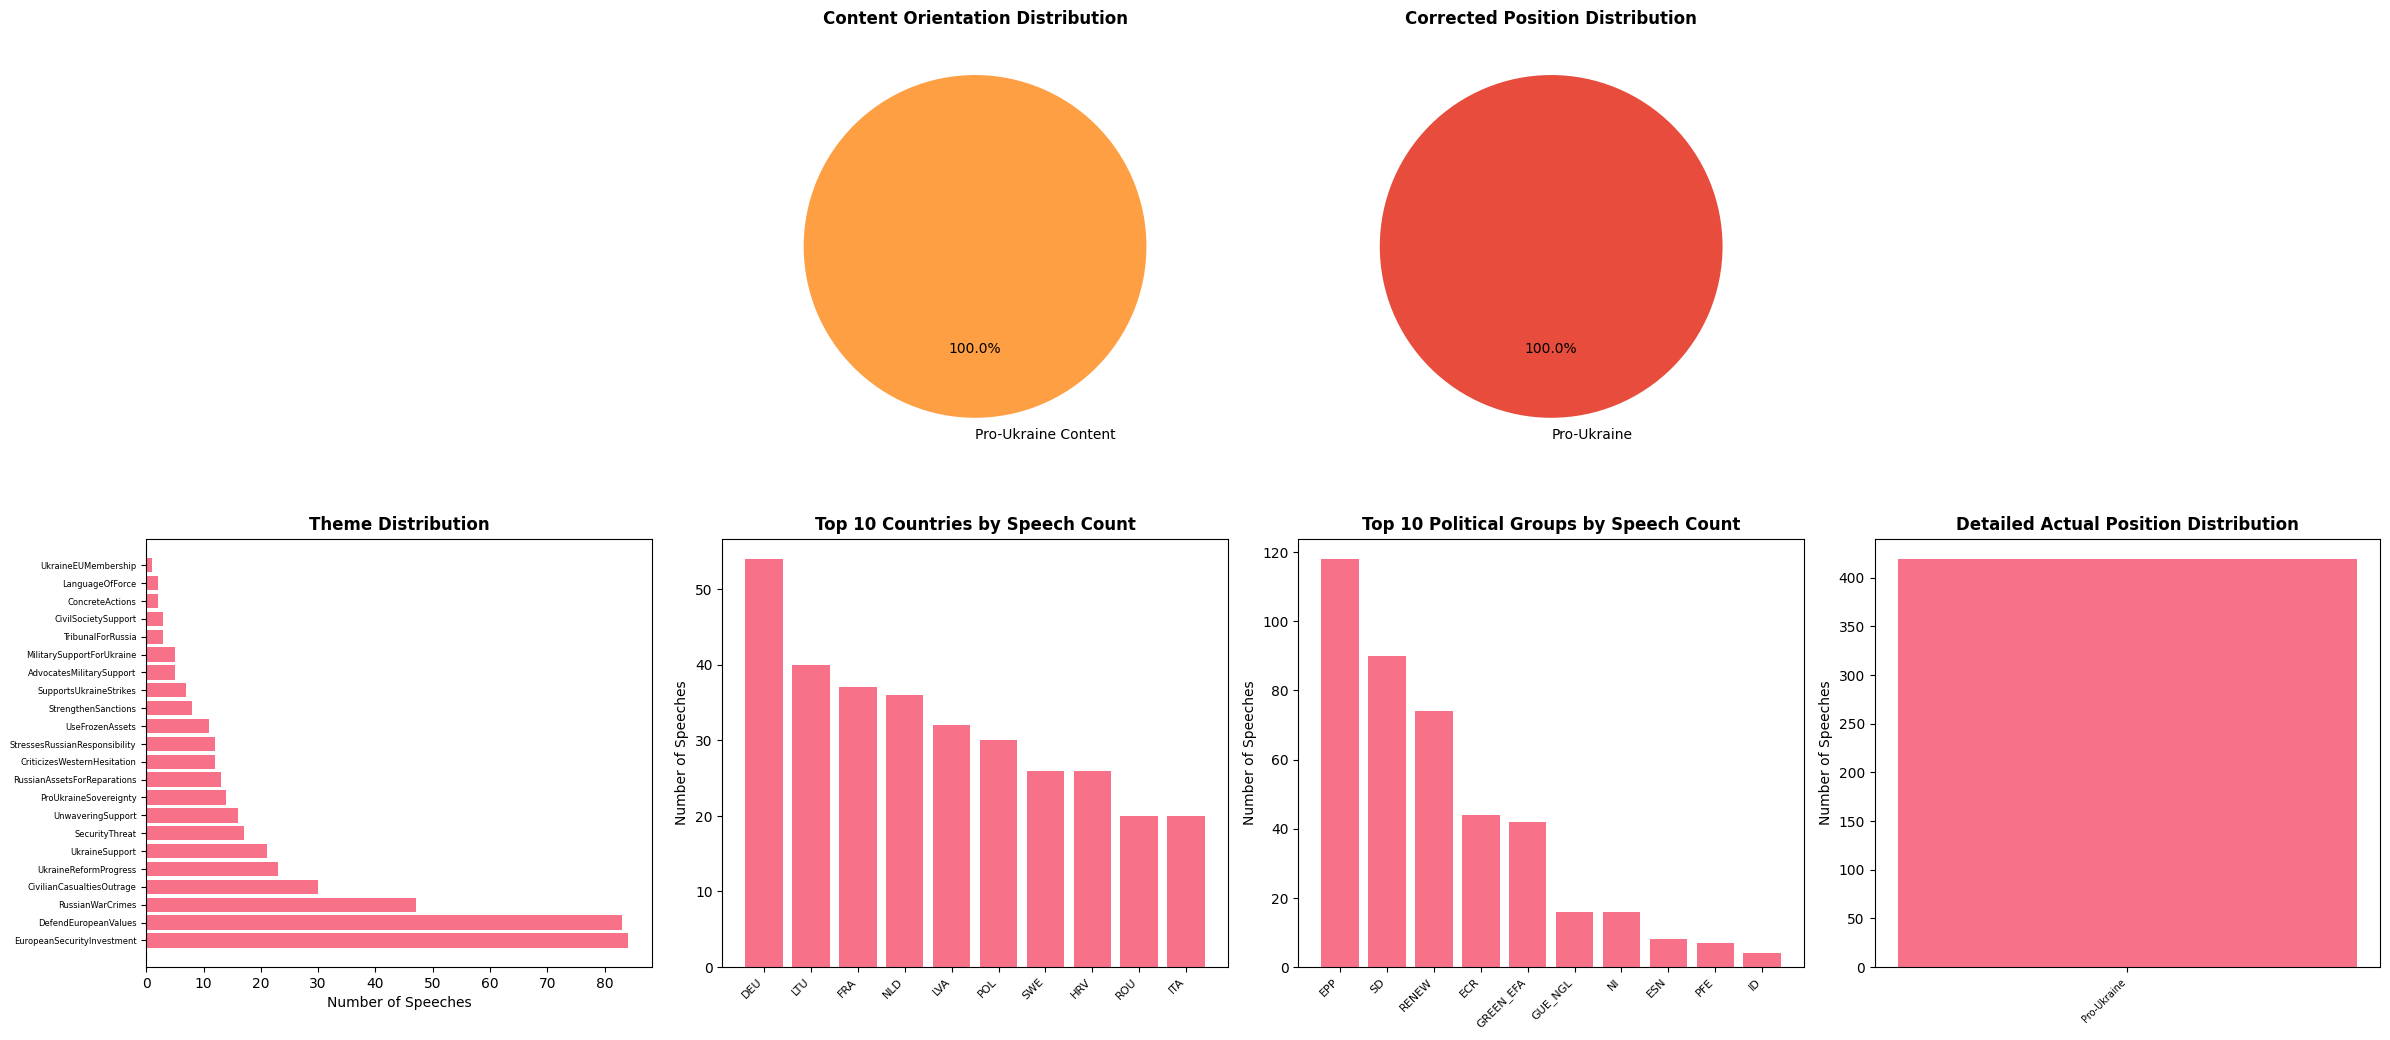

In [11]:
print("\n" + "="*50)
print("CREATING ENHANCED VISUALIZATIONS")
print("="*50)

# Create enhanced visualizations
fig = plt.figure(figsize=(24, 20))

# 1. Content Orientation distribution
if 'content_orientation' in df_known_positions.columns:
    plt.subplot(4, 4, 2)
    content_counts = df['content_orientation'].value_counts()
    colors = ['#ff9f43', '#10ac84', '#5f27cd']
    plt.pie(content_counts.values, labels=content_counts.index, autopct='%1.1f%%', 
            colors=colors[:len(content_counts)], startangle=90)
    plt.title('Content Orientation Distribution', fontsize=12, fontweight='bold')

# 2. Corrected Position distribution
if 'simplified_position' in df_known_positions.columns:
    plt.subplot(4, 4, 3)
    position_counts = df_known_positions['simplified_position'].value_counts()
    colors = ['#e74c3c', '#27ae60', '#3498db', '#9b59b6']
    plt.pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%', 
            colors=colors[:len(position_counts)], startangle=90)
    plt.title('Corrected Position Distribution', fontsize=12, fontweight='bold')

# 4. Theme distribution
if 'theme_name' in df_known_positions.columns:
    plt.subplot(4, 4, 5)
    theme_counts = df_known_positions['theme_name'].value_counts()
    plt.barh(range(len(theme_counts)), theme_counts.values)
    plt.yticks(range(len(theme_counts)), theme_counts.index, fontsize=6)
    plt.xlabel('Number of Speeches')
    plt.title('Theme Distribution', fontsize=12, fontweight='bold')

# 5. Top countries
if 'country' in df_known_positions.columns:
    plt.subplot(4, 4, 6)
    top_countries = df_known_positions['country'].value_counts().head(10)
    plt.bar(range(len(top_countries)), top_countries.values)
    plt.xticks(range(len(top_countries)), top_countries.index, rotation=45, ha='right', fontsize=8)
    plt.ylabel('Number of Speeches')
    plt.title('Top 10 Countries by Speech Count', fontsize=12, fontweight='bold')

# 6. Top political groups
if 'group_code' in df_known_positions.columns:
    plt.subplot(4, 4, 7)
    top_groups = df_known_positions['group_code'].value_counts().head(10)
    plt.bar(range(len(top_groups)), top_groups.values)
    plt.xticks(range(len(top_groups)), top_groups.index, rotation=45, ha='right', fontsize=8)
    plt.ylabel('Number of Speeches')
    plt.title('Top 10 Political Groups by Speech Count', fontsize=12, fontweight='bold')

# 7. Actual Position breakdown (detailed)
if 'actual_position' in df_known_positions.columns:
    plt.subplot(4, 4, 8)
    actual_counts = df_known_positions['actual_position'].value_counts()
    plt.bar(range(len(actual_counts)), actual_counts.values)
    plt.xticks(range(len(actual_counts)), actual_counts.index, rotation=45, ha='right', fontsize=7)
    plt.ylabel('Number of Speeches')
    plt.title('Detailed Actual Position Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 10. Heatmap Visualizations
Create heatmaps to show relationships between countries, groups, and positions.


Creating country-position heatmaps with corrected positions...


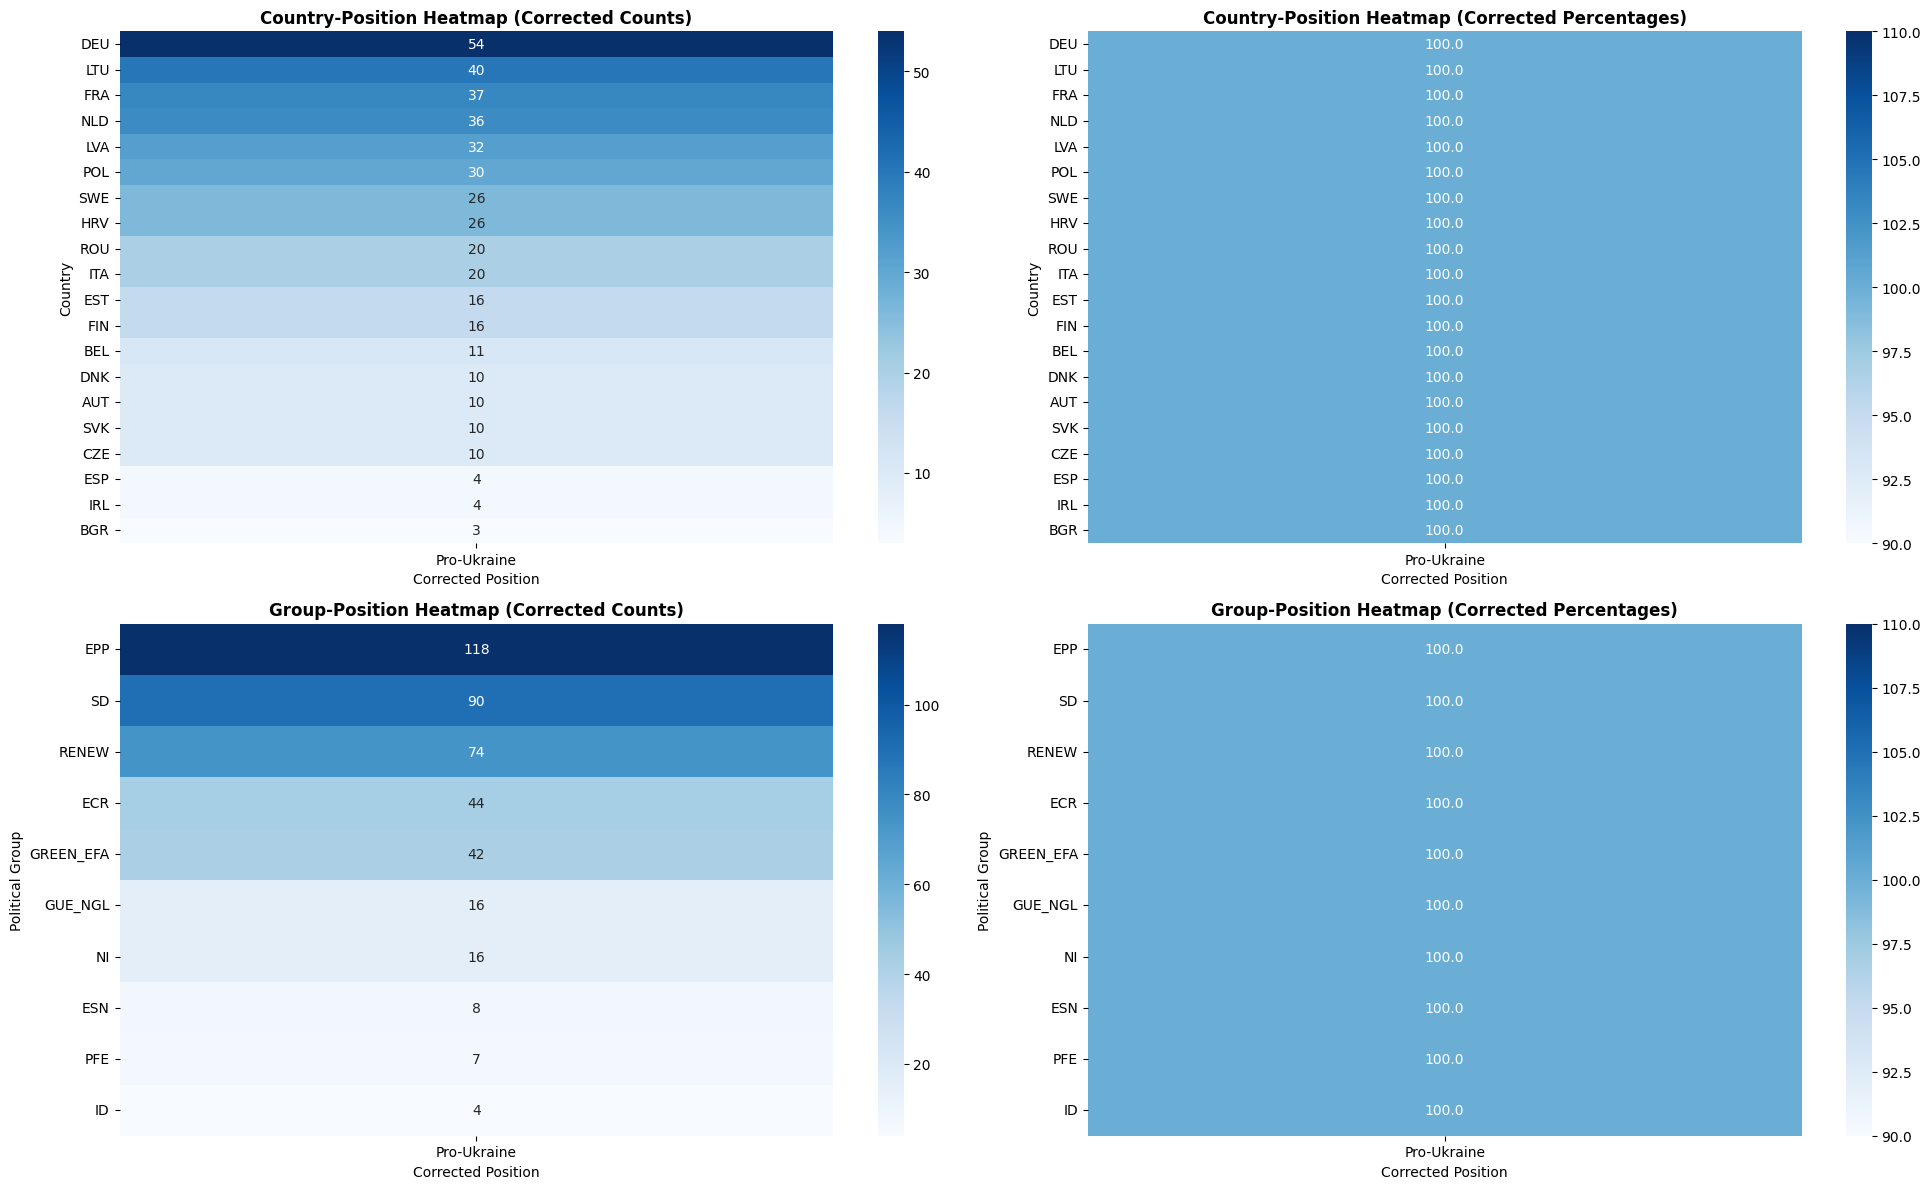

In [12]:
# Country-Position Heatmaps with Corrected Positions
if 'country' in df_known_positions.columns and 'simplified_position' in df_known_positions.columns:
    print("\nCreating country-position heatmaps with corrected positions...")
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    # Filter for active countries
    active_countries = df_known_positions['country'].value_counts()
    active_countries = active_countries[active_countries >= 3].index.tolist()
    
    if len(active_countries) > 0:
        country_position = pd.crosstab(df_known_positions['country'], df_known_positions['simplified_position'])
        country_position_filtered = country_position.loc[active_countries]
        
        # Counts heatmap
        sns.heatmap(country_position_filtered, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
        axes[0,0].set_title('Country-Position Heatmap (Corrected Counts)', fontweight='bold')
        axes[0,0].set_xlabel('Corrected Position')
        axes[0,0].set_ylabel('Country')
        
        # Percentages heatmap
        country_position_pct = country_position_filtered.div(country_position_filtered.sum(axis=1), axis=0) * 100
        sns.heatmap(country_position_pct, annot=True, fmt='.1f', cmap='Blues', ax=axes[0,1])
        axes[0,1].set_title('Country-Position Heatmap (Corrected Percentages)', fontweight='bold')
        axes[0,1].set_xlabel('Corrected Position')
        axes[0,1].set_ylabel('Country')
    
    # Group-Position analysis if available
    if 'group_code' in df_known_positions.columns:
        active_groups = df_known_positions['group_code'].value_counts()
        active_groups = active_groups.index.tolist()        
        if len(active_groups) > 0:
            group_position = pd.crosstab(df_known_positions['group_code'], df_known_positions['simplified_position'])
            group_position_filtered = group_position.loc[active_groups]
            
            # Counts heatmap
            sns.heatmap(group_position_filtered, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
            axes[1,0].set_title('Group-Position Heatmap (Corrected Counts)', fontweight='bold')
            axes[1,0].set_xlabel('Corrected Position')
            axes[1,0].set_ylabel('Political Group')
            
            # Percentages heatmap
            group_position_pct = group_position_filtered.div(group_position_filtered.sum(axis=1), axis=0) * 100
            sns.heatmap(group_position_pct, annot=True, fmt='.1f', cmap='Blues', ax=axes[1,1])
            axes[1,1].set_title('Group-Position Heatmap (Corrected Percentages)', fontweight='bold')
            axes[1,1].set_xlabel('Corrected Position')
            axes[1,1].set_ylabel('Political Group')
    
    plt.tight_layout()
    plt.show()

# 11. Summary Statistics
Provide a comprehensive summary of the analysis findings.

In [13]:
print("\n" + "="*50)
print("FINAL CORRECTED SUMMARY")
print("="*50)

summary_stats = {
    'Total Speeches': len(df),
    'Unique Speakers': df['person_id'].nunique() if 'person_id' in df.columns else 'N/A',
    'Unique Countries': df['country'].nunique() if 'country' in df.columns else 'N/A',
    'Unique Political Groups': df['group_code'].nunique() if 'group_code' in df.columns else 'N/A',
    'Unique Themes': df['theme_name'].nunique() if 'theme_name' in df.columns else 'N/A'
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

# Corrected position breakdown
if 'simplified_position' in df.columns:
    print(f"\nCORRECTED Position breakdown:")
    position_summary = df['simplified_position'].value_counts(normalize=True) * 100
    for pos, pct in position_summary.items():
        print(f"  {pos}: {pct:.1f}%")

# Show the correction impact
if 'content_orientation' in df.columns and 'simplified_position' in df.columns:
    print(f"\nCORRECTION IMPACT ANALYSIS:")
    print("This analysis shows how speaker stance + content orientation = actual position")
    
    correction_examples = df.groupby(['classification_clean', 'content_orientation', 'simplified_position']).size().reset_index(name='count')
    correction_examples = correction_examples[correction_examples['count'] > 0].sort_values('count', ascending=False)
    
    print("\nTop correction patterns:")
    for _, row in correction_examples.head(10).iterrows():
        if row['classification_clean'] != 'neutral':
            stance = "supports" if row['classification_clean'] == "supports" else "opposes"
            print(f"  Speaker {stance} {row['content_orientation']} → {row['simplified_position']} ({row['count']} speeches)")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)


FINAL CORRECTED SUMMARY
Total Speeches: 7625
Unique Speakers: 100
Unique Countries: 24
Unique Political Groups: 10
Unique Themes: 25

CORRECTED Position breakdown:
  Neutral/Mixed: 72.2%
  Other/Unknown: 22.3%
  Pro-Ukraine: 5.5%

CORRECTION IMPACT ANALYSIS:
This analysis shows how speaker stance + content orientation = actual position

Top correction patterns:
  Speaker opposes Pro-Ukraine Content → Other/Unknown (1399 speeches)
  Speaker supports Pro-Ukraine Content → Pro-Ukraine (419 speeches)

ANALYSIS COMPLETE
